[*********************100%***********************]  1 of 1 completed

--- Fetching historical data for TSLA ---
--- Training ARIMA model on full dataset ---


--- Forecasting the next 30 days ---
--- Generating forecast plot ---


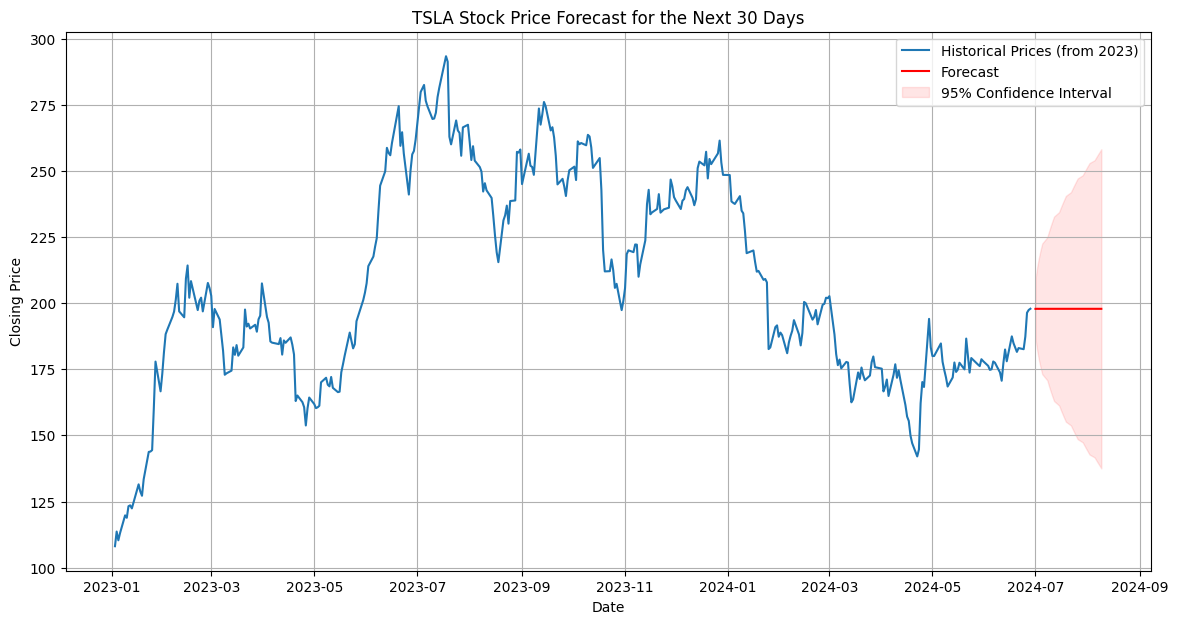


--- Next 30 Day Forecasted Prices ---
2024-07-01    197.832817
2024-07-02    197.859263
2024-07-03    197.844442
2024-07-04    197.852748
2024-07-05    197.848093
2024-07-08    197.850702
2024-07-09    197.849240
2024-07-10    197.850059
2024-07-11    197.849600
2024-07-12    197.849857
2024-07-15    197.849713
2024-07-16    197.849794
2024-07-17    197.849748
2024-07-18    197.849774
2024-07-19    197.849760
2024-07-22    197.849768
2024-07-23    197.849763
2024-07-24    197.849766
2024-07-25    197.849764
2024-07-26    197.849765
2024-07-29    197.849765
2024-07-30    197.849765
2024-07-31    197.849765
2024-08-01    197.849765
2024-08-02    197.849765
2024-08-05    197.849765
2024-08-06    197.849765
2024-08-07    197.849765
2024-08-08    197.849765
2024-08-09    197.849765
Freq: B, Name: predicted_mean, dtype: float64

--- Confidence Intervals ---
            lower TSLA  upper TSLA
2024-07-01  186.618403  209.047231
2024-07-02  182.221371  213.497155
2024-07-03  178.681642  217.00

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings('ignore')

ticker_symbol = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-06-30'

print(f"--- Fetching historical data for {ticker_symbol} ---")
data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=True)
data.dropna(inplace=True)
close_prices = data['Close']

print("--- Training ARIMA model on full dataset ---")
arima_model = ARIMA(close_prices, order=(1, 1, 1))
arima_fit = arima_model.fit()

forecast_period = 30
print(f"--- Forecasting the next {forecast_period} days ---")
forecast_result = arima_fit.get_forecast(steps=forecast_period)
forecast_series = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

last_date = close_prices.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_period + 1, freq='B')[1:]
forecast_series.index = future_dates
confidence_intervals.index = future_dates

print("--- Generating forecast plot ---")
plt.figure(figsize=(14, 7))
plt.plot(close_prices.loc['2023-01-01':], label='Historical Prices (from 2023)')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='red', alpha=0.1, label='95% Confidence Interval')
plt.title(f'{ticker_symbol} Stock Price Forecast for the Next {forecast_period} Days')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Next 30 Day Forecasted Prices ---")
print(forecast_series)
print("\n--- Confidence Intervals ---")
print(confidence_intervals)
